<a href="https://colab.research.google.com/github/minhquangngo/msc_thesis/blob/main/py/collab_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INIT

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%cd "/content/drive/MyDrive/masters_thesis/msc_thesis"

/content/drive/MyDrive/masters_thesis/msc_thesis


In [26]:
!pwd

/content/drive/MyDrive/masters_thesis/msc_thesis


In [27]:
#!git clone https://github.com/minhquangngo/msc_thesis

In [28]:
!git pull

Already up to date.


In [29]:
!ls

attachments  latex  msc_thesis	py  README.md  requirements.txt


In [30]:
!pip install -r requirements.txt

In [31]:
!apt-get update -qq
!apt-get install -y -qq \
    texlive-latex-base \
    texlive-latex-extra \
    texlive-fonts-recommended \
    dvipng \
    cm-super


'Sat May 31 00:05:50 2025'

Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1build1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1build1) ...
Selecting previously unselected package fonts-lato.
Preparing to unpack .../01-fonts-lato_2.0-2.1_all.deb ...
Unpacking fonts-lato (2.0-2.1) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.11-1_all.deb ...
Unpacking poppler-data (0.4.11-1) ...
Selecting previously unselected package tex-common.
Preparing to unpack .../03-tex-common_6.17_all.deb ...
Unpacking tex-common (6.17) ...
Selecting previously unselected package libkpathsea6:amd64.
Preparing to unpack .../04-libkpathsea6_2021.20210626.59705-1ubuntu0.2_amd64.deb ...
Unpacking libkpathsea6:amd64 (2021.20210626.59705-1ubuntu0.2) ...
Selecti

In [32]:
import pandas as pd
from pathlib import Path
import mlflow
import os
import subprocess
import time


In [33]:
data_dir = Path('/content/drive/MyDrive/masters_thesis/data')
os.environ['data_dir'] = str(data_dir)

In [34]:
import mlflow, os

In [35]:
MLFLOW_DIR = Path('/content/drive/MyDrive/masters_thesis/mlflow')
MLFLOW_DIR.mkdir(exist_ok=True)
os.environ['MLFLOW_TRACKING_URI'] = f'file://{MLFLOW_DIR}'
mlflow.set_tracking_uri(os.environ['MLFLOW_TRACKING_URI'])

Keeping the instance awke so that the runs does not get shut off

In [36]:
import time, threading, IPython.display as disp
def keep_awake():
    while True:
        time.sleep(60)
        disp.clear_output(wait=True); disp.display(time.ctime())
threading.Thread(target=keep_awake).start()

In [37]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/masters_thesis/msc_thesis/py')

In [38]:
%cd "/content/drive/MyDrive/masters_thesis/msc_thesis/py"

/content/drive/MyDrive/masters_thesis/msc_thesis/py


In [39]:
import models

## DATA IMPORTS

In [40]:
data_dir

PosixPath('/content/drive/MyDrive/masters_thesis/data')

In [41]:
df_dict = {
    file.stem.replace("sector_","") : pd.read_parquet(file)
    for file in data_dir.glob("sector_*.parquet")
}

In [42]:
df_dict['10']

vol       ret        shrout        prc      askhi  \
index                                                                    
1998-01-02  1.420280e+06  0.003287  1.013942e+06  62.745296  63.068083   
1998-01-05  2.406067e+06 -0.021214  1.019566e+06  61.345891  62.921670   
1998-01-06  3.054767e+06 -0.034761  1.018568e+06  59.217327  60.627729   
1998-01-07  3.424121e+06  0.024678  1.023829e+06  60.827941  61.007635   
1998-01-08  2.111215e+06 -0.026138  1.026307e+06  59.194500  60.581523   
...                  ...       ...           ...        ...        ...   
2018-12-21  2.347036e+07 -0.010369  1.883786e+06  66.738612  68.679728   
2018-12-24  7.596090e+06 -0.040239  1.888364e+06  64.208265  66.537325   
2018-12-26  1.292724e+07  0.062713  1.874340e+06  68.235958  68.260304   
2018-12-27  1.189542e+07  0.006472  1.873945e+06  68.997290  69.016614   
2018-12-28  9.846492e+06 -0.008945  1.873197e+06  68.420173  69.738306   

                bidlo    put_volume   call_volume  put_call_ratio  vix_close  \
index                                                                          
1998-01-02  61.909911    517.261250    334.857022        1.847545  23.420000   
1998-01-05  60.701696    530.978253    660.178316        1.212341  24.360001   
1998-01-06  58.551701   1616.712030   1889.734468        1.173952  25.660000   
1998-01-07  58.900709    698.726996   1089.622229        0.860878  25.070000   
1998-01-08  58.992218    803.304360   1392.336539        0.953283  26.010000   
...               ...           ...           ...             ...        ...   
2018-12-21  66.089400  11076.968965  11395.992407        1.101672  30.110001   
2018-12-24  64.152997   8901.756413  12131.554525        0.944079  36.070000   
2018-12-26  63.652624   8887.402809  17054.673252        0.715864  30.410000   
2018-12-27  66.134674   5811.118599  12469.599469        0.656975  29.959999   
2018-12-28  67.865446  10260.043185  11810.358035        0.937285  28.340000   

            ...  enhanced_baker  news_sent        mktcap   turn_sd  \
index       ...                                                      
1998-01-02  ...           2.396       0.27  6.448867e+07  3.072879   
1998-01-05  ...           2.396       0.25  6.375211e+07  3.072879   
1998-01-06  ...           2.396       0.25  6.141981e+07  3.072879   
1998-01-07  ...           2.396       0.26  6.361143e+07  3.072879   
1998-01-08  ...           2.396       0.22  6.219968e+07  3.072879   
...         ...             ...        ...           ...       ...   
2018-12-21  ...           2.409      -0.04  1.307736e+08  3.072879   
2018-12-24  ...           2.409      -0.04  1.263795e+08  3.072879   
2018-12-26  ...           2.409      -0.08  1.324008e+08  3.072879   
2018-12-27  ...           2.409      -0.07  1.337375e+08  3.072879   
2018-12-28  ...           2.409      -0.07  1.324667e+08  3.072879   

             sect_mktcap      mvel1        dolvol  daily_illq  excess_ret  \
index                                                                       
1998-01-02  6.362010e+07  17.982000  8.911586e+07    0.000037    0.003077   
1998-01-05  6.254618e+07  17.970513  1.476023e+08    0.000144   -0.021424   
1998-01-06  6.031685e+07  17.933243  1.808951e+08    0.000192   -0.034971   
1998-01-07  6.227738e+07  17.968304  2.082822e+08    0.000118    0.024468   
1998-01-08  6.075174e+07  17.945860  1.249723e+08    0.000209   -0.026348   
...                  ...        ...           ...         ...         ...   
2018-12-21  1.257212e+08  18.688979  1.566379e+09    0.000007   -0.010479   
2018-12-24  1.212486e+08  18.654799  4.877318e+08    0.000083   -0.040349   
2018-12-26  1.278974e+08  18.701344  8.821027e+08    0.000071    0.062603   
2018-12-27  1.292971e+08  18.711390  8.207516e+08    0.000008    0.006362   
2018-12-28  1.281645e+08  18.701842  6.736987e+08    0.000013   -0.009055   

            excess_mkt_ret  
index                       
1998-01-02         0.00199  
1998-01-05       

In [43]:
features_c4f = ['excess_mkt_ret','smb', 'hml','umd']

In [44]:
features_ff5 = ['excess_mkt_ret','smb', 'hml','umd','cma']

In [45]:
for sector, df in df_dict.items():
    model = models.olsmodel(
        y='excess_ret',
        features=features_c4f,
        lags=3,
        run_name=f'{sector}_baseline',
        fama_french_ver='c4f',
        experiment_name='baseline_ols'
    )
    model.fit(df)

'Sat May 31 00:06:50 2025'

Skipping- already logged this model
Experiment already exists with ID: 124837757205539114
Skipping- already logged this model
Experiment already exists with ID: 124837757205539114
Skipping- already logged this model


'Sat May 31 00:08:50 2025'

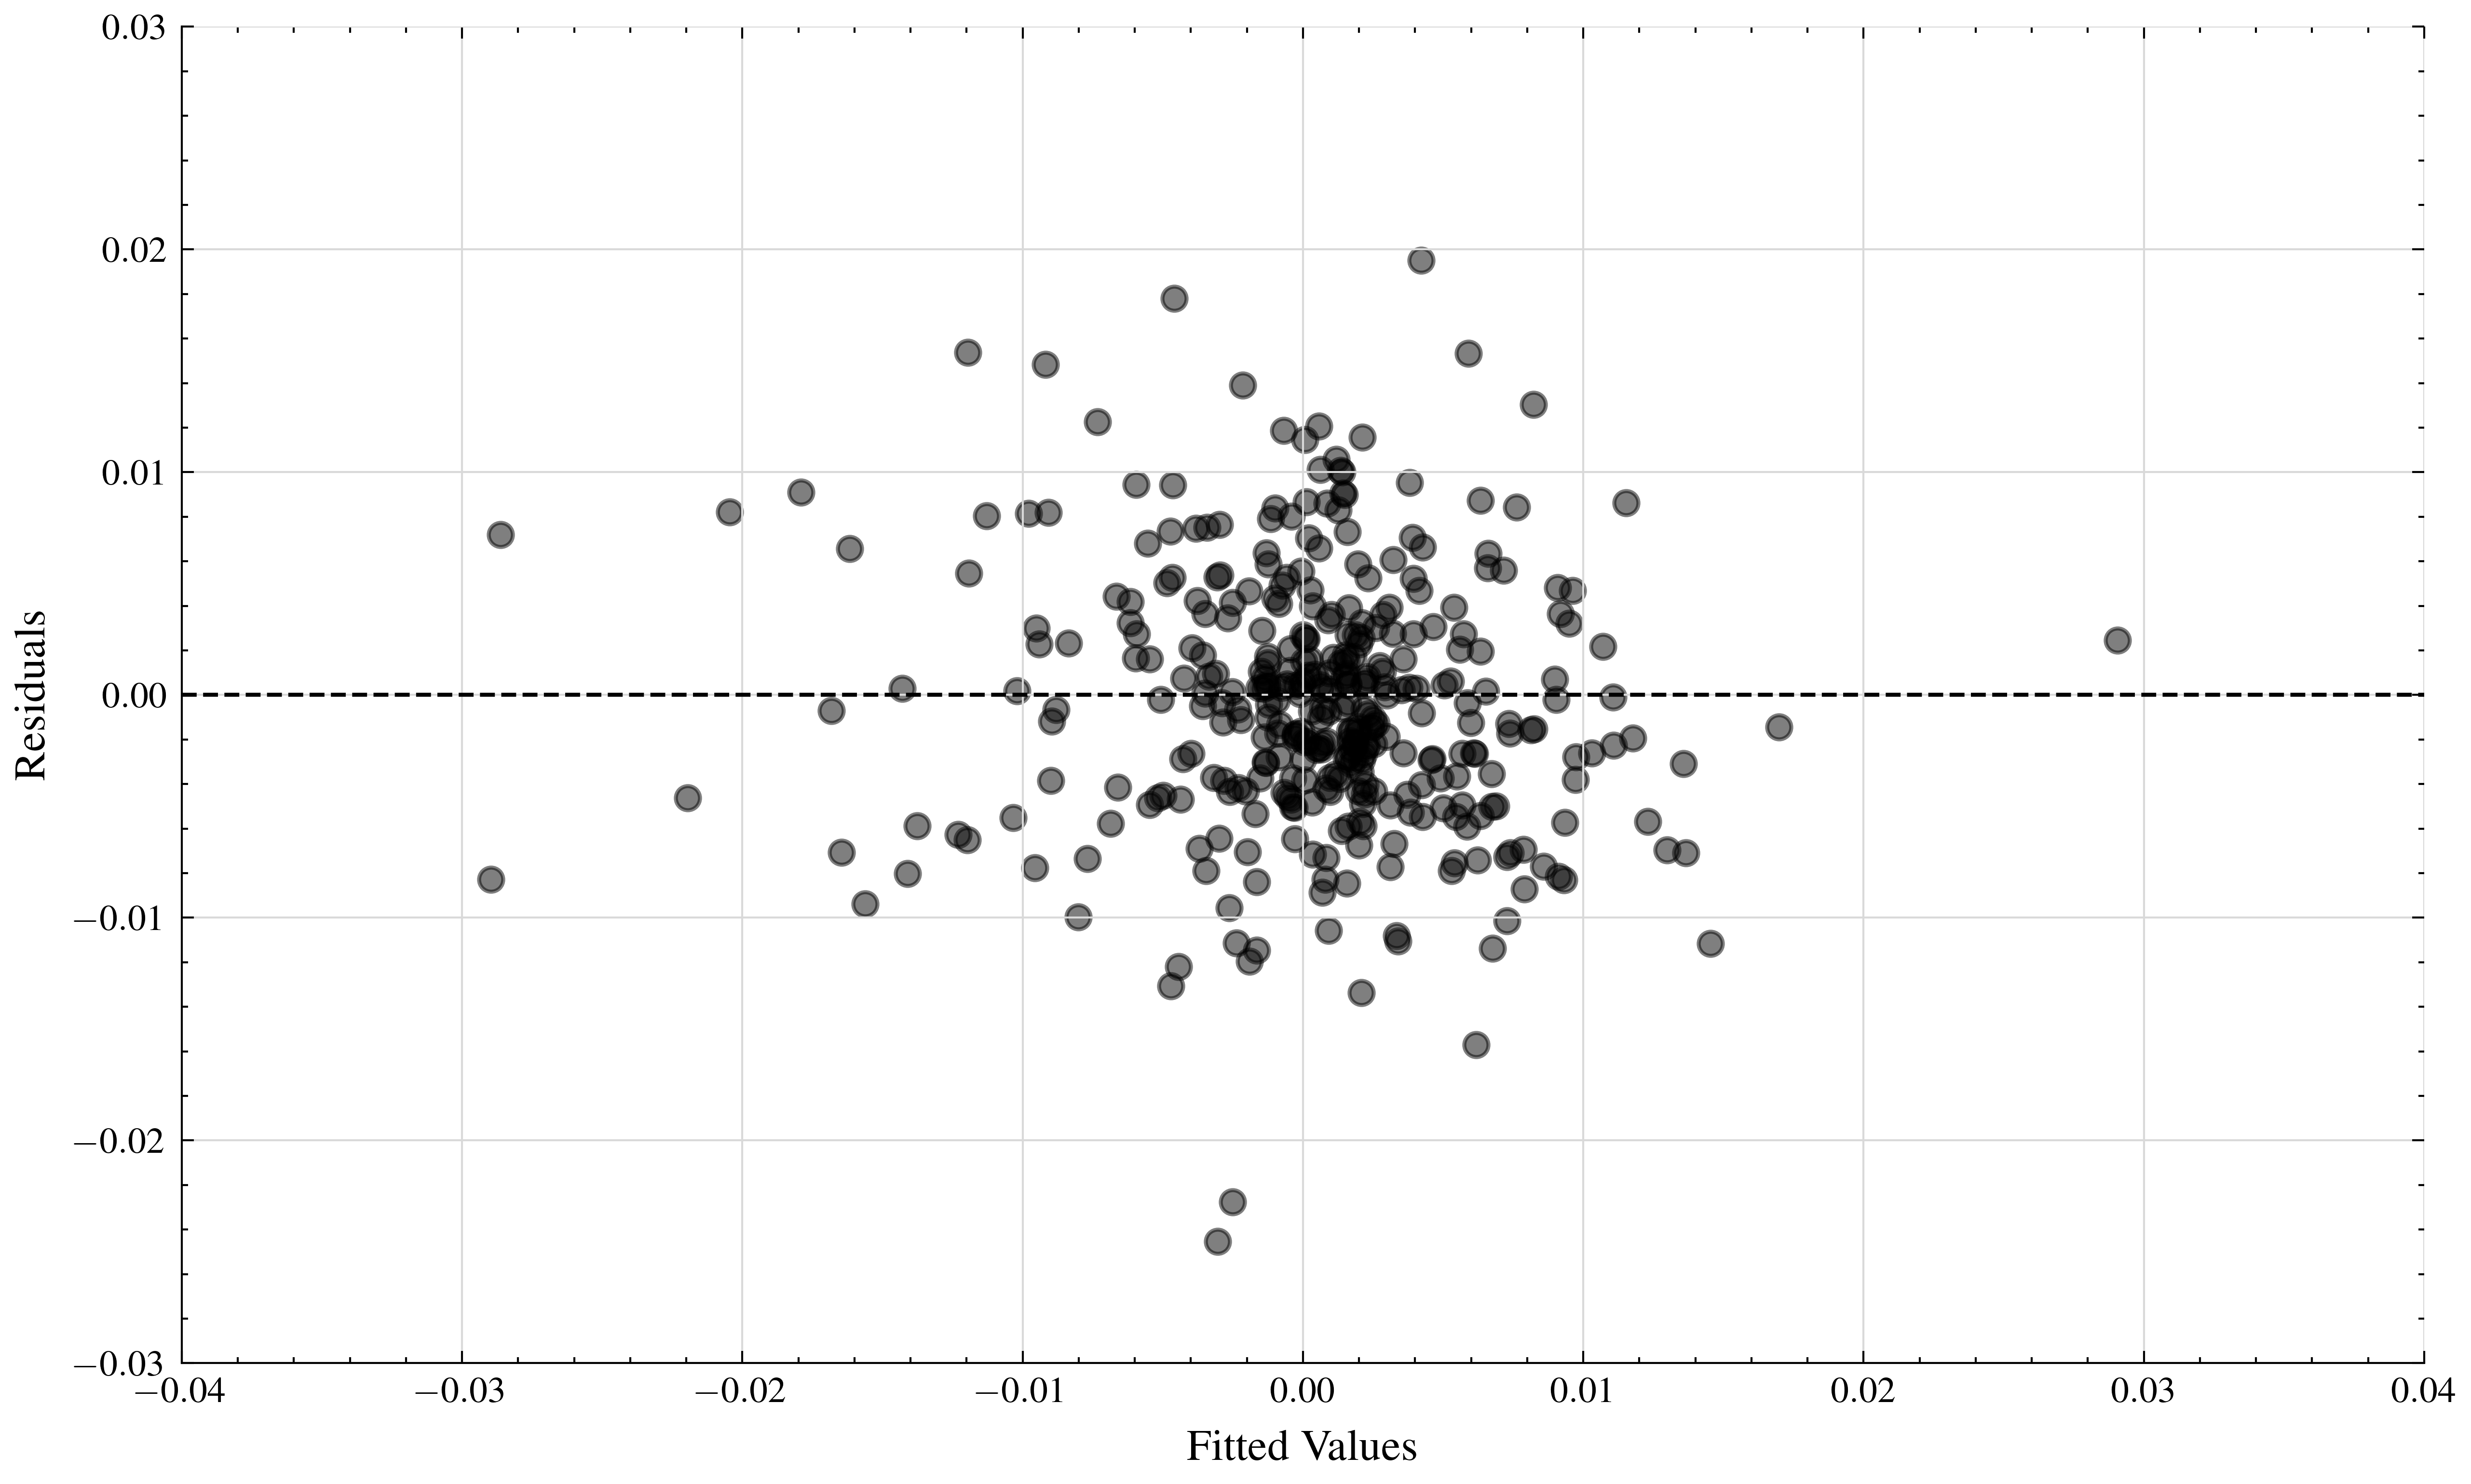

Displayed: Residuals plot for 30_baseline - hold
Experiment already exists with ID: 124837757205539114


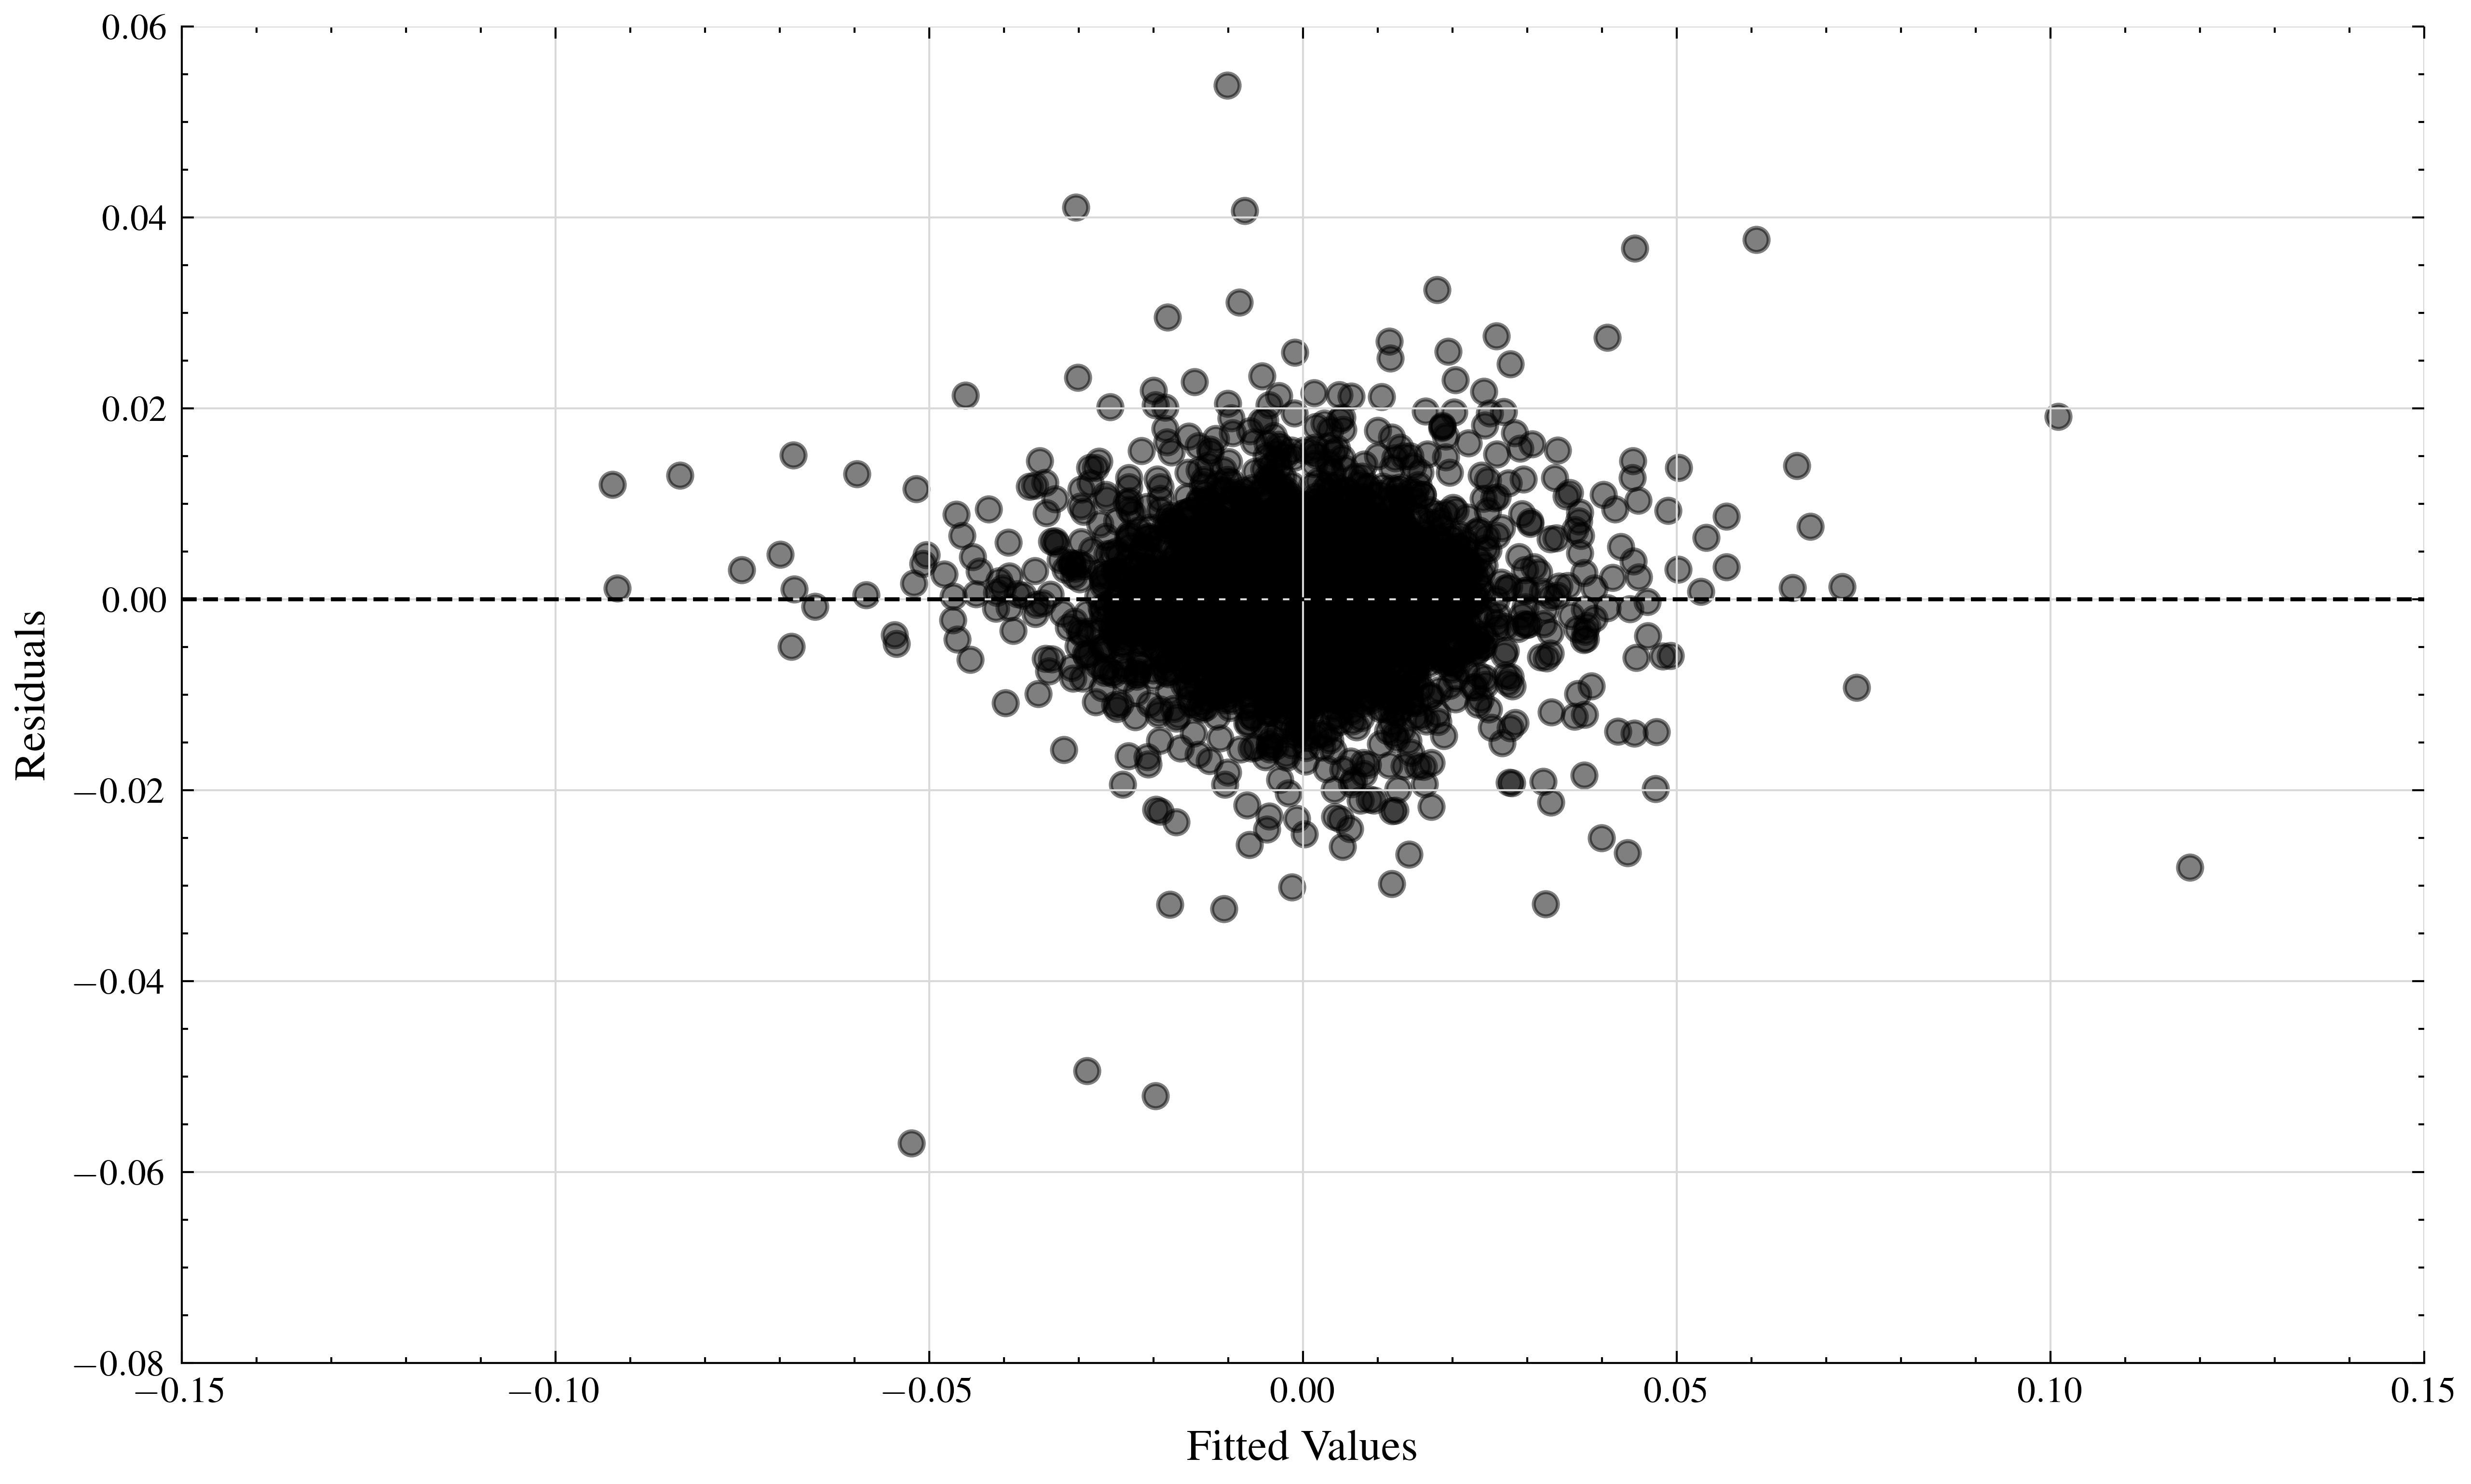

Displayed: Residuals plot for 25_baseline - sample


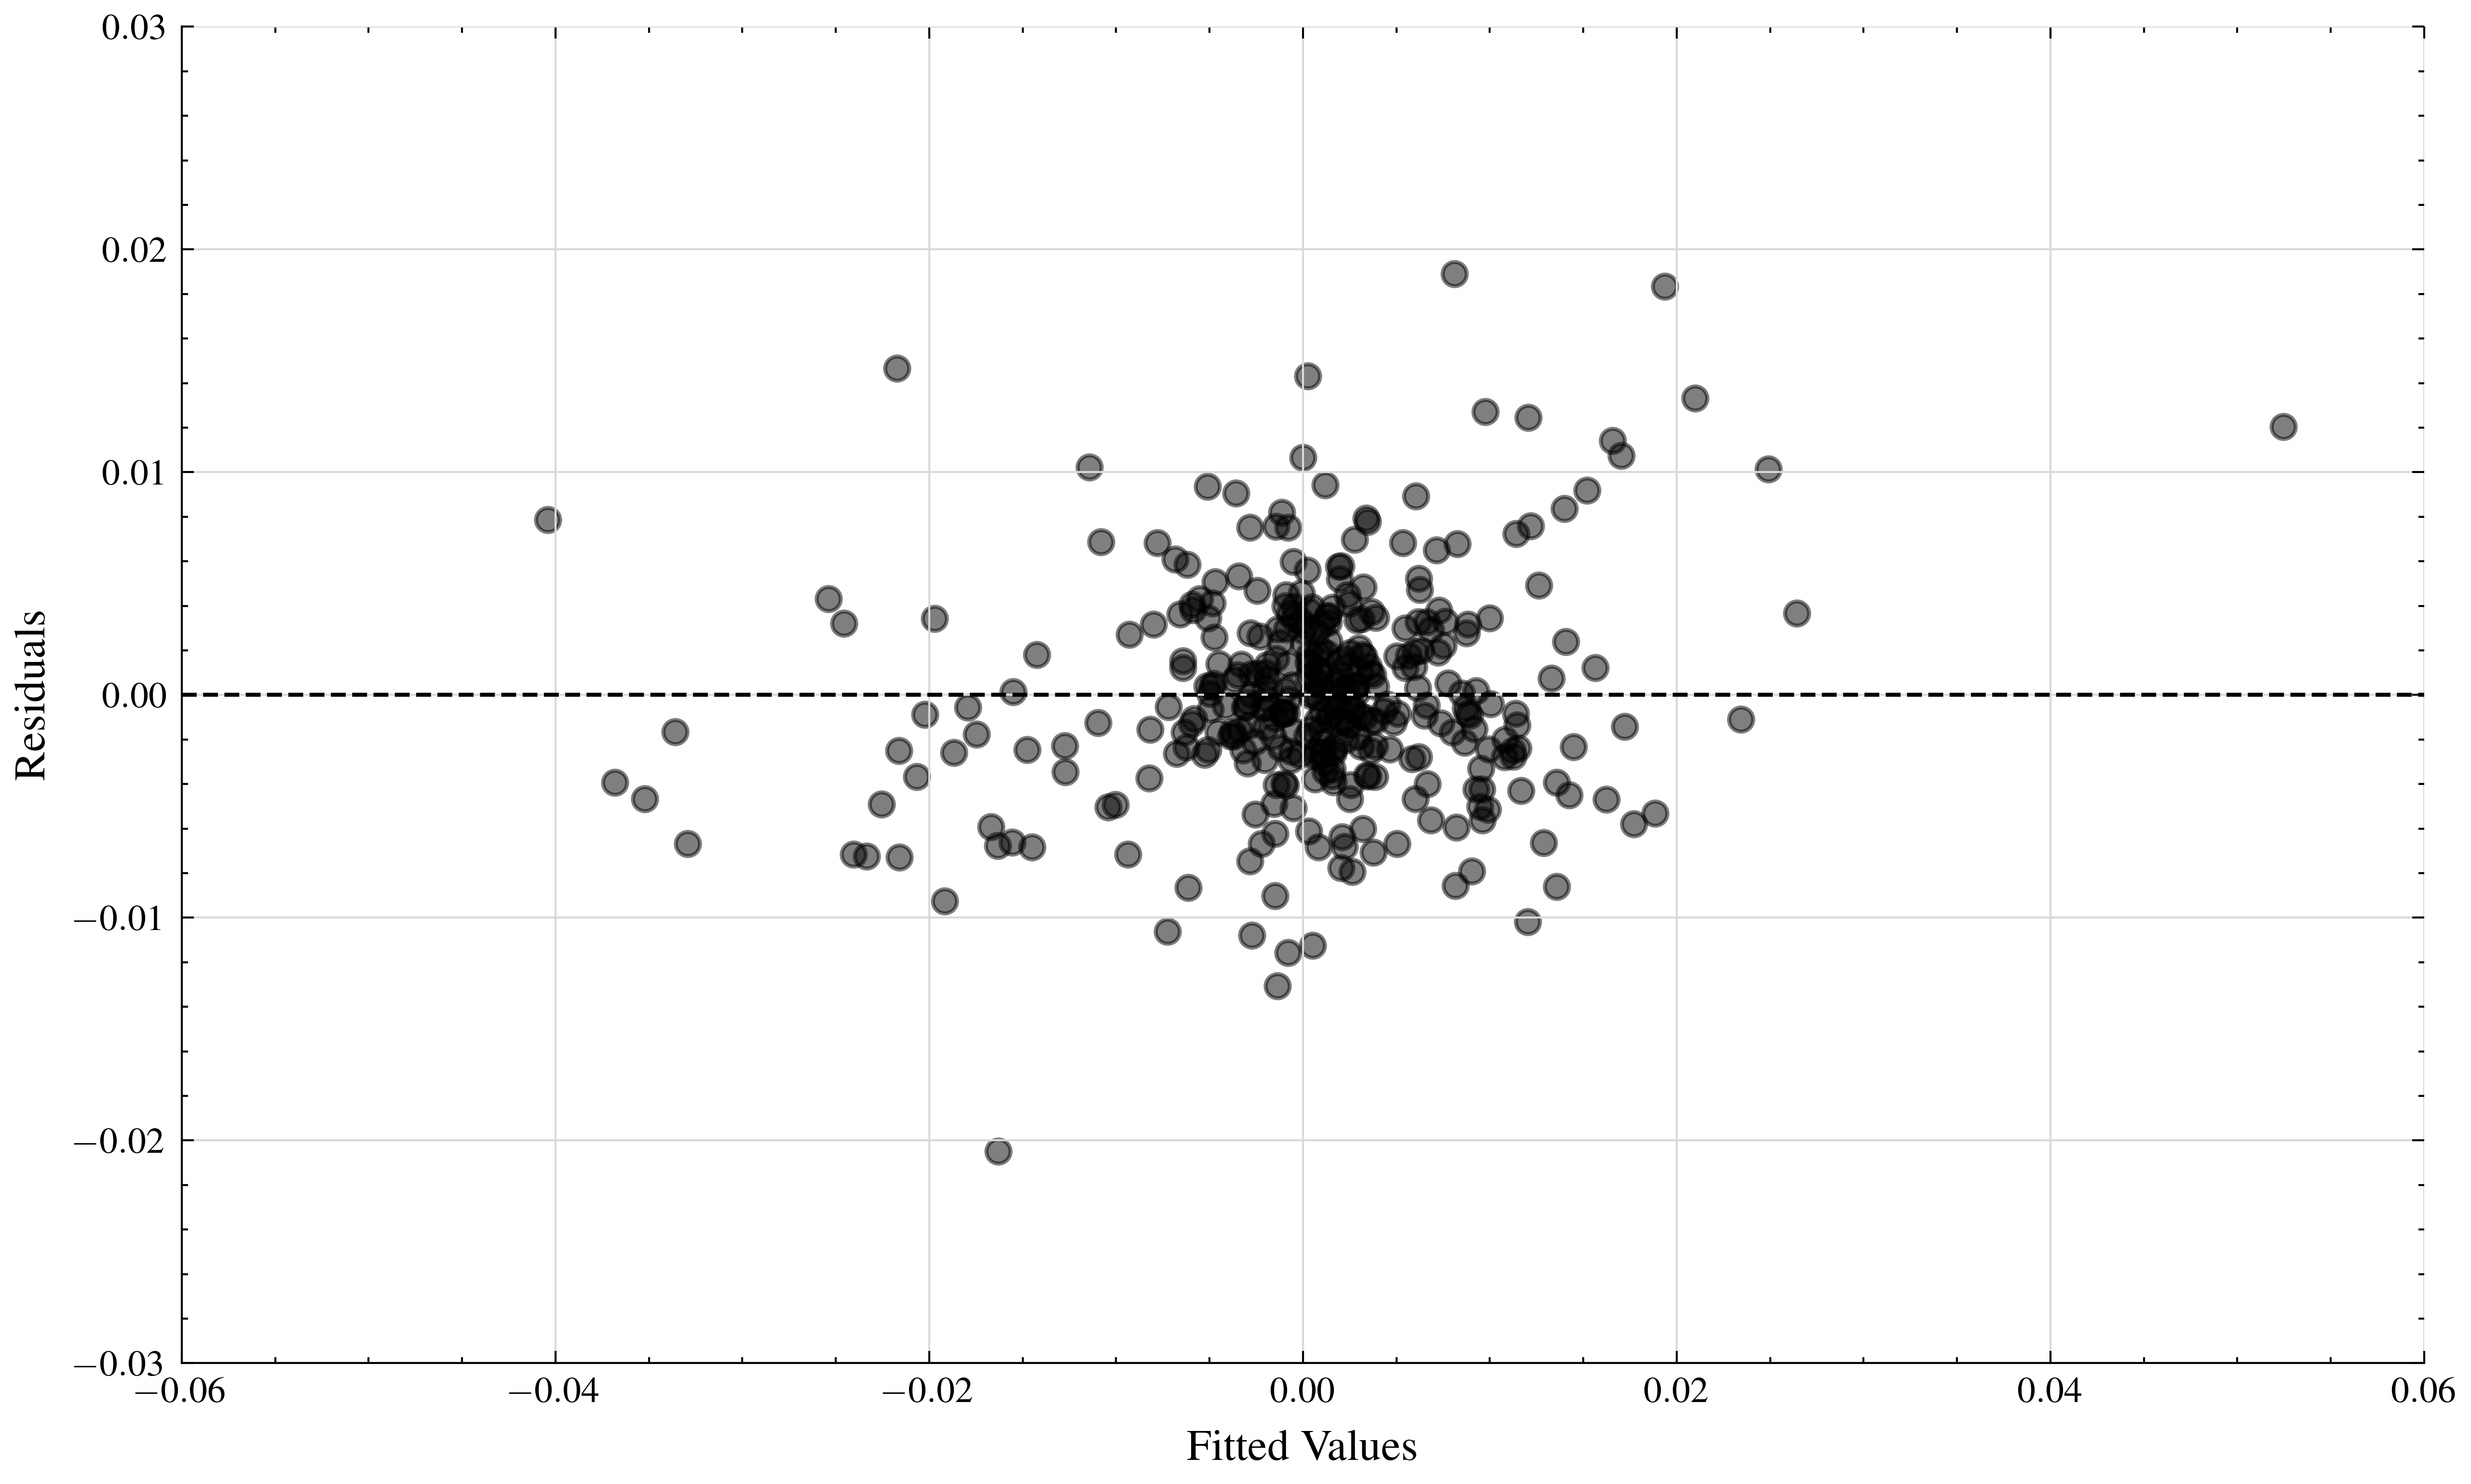

Displayed: Residuals plot for 25_baseline - hold
Experiment already exists with ID: 124837757205539114


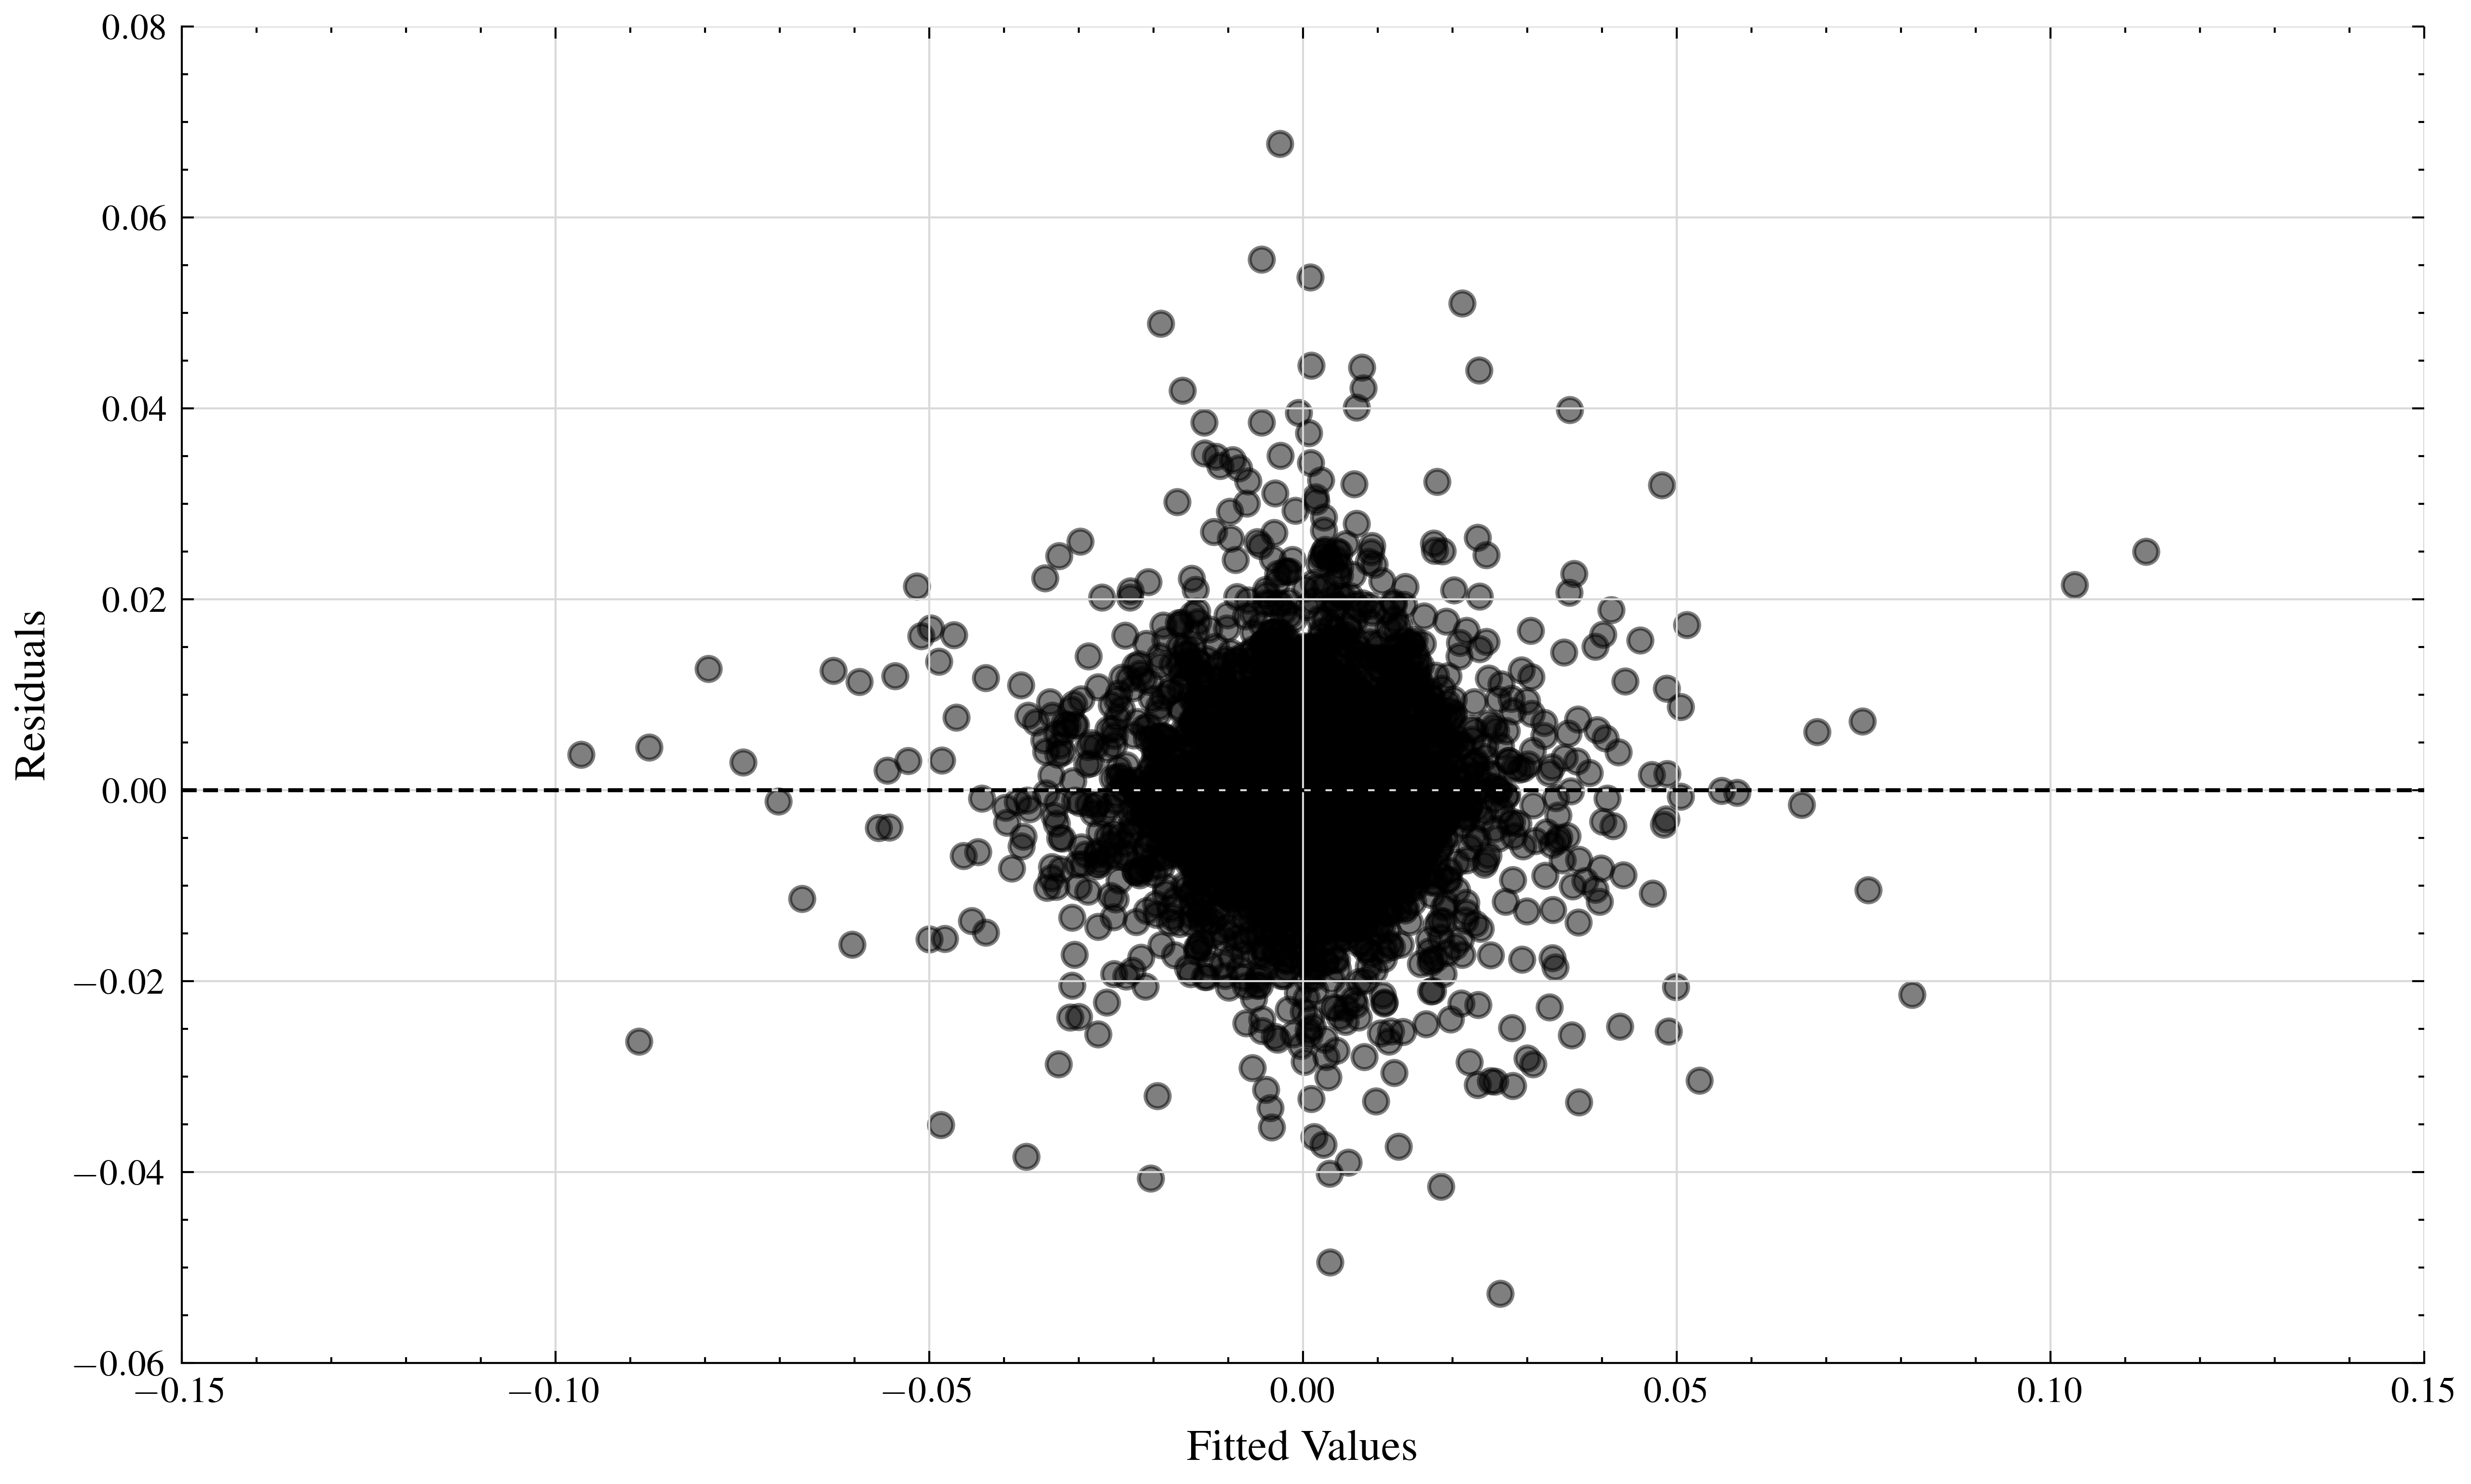

Displayed: Residuals plot for 15_baseline - sample


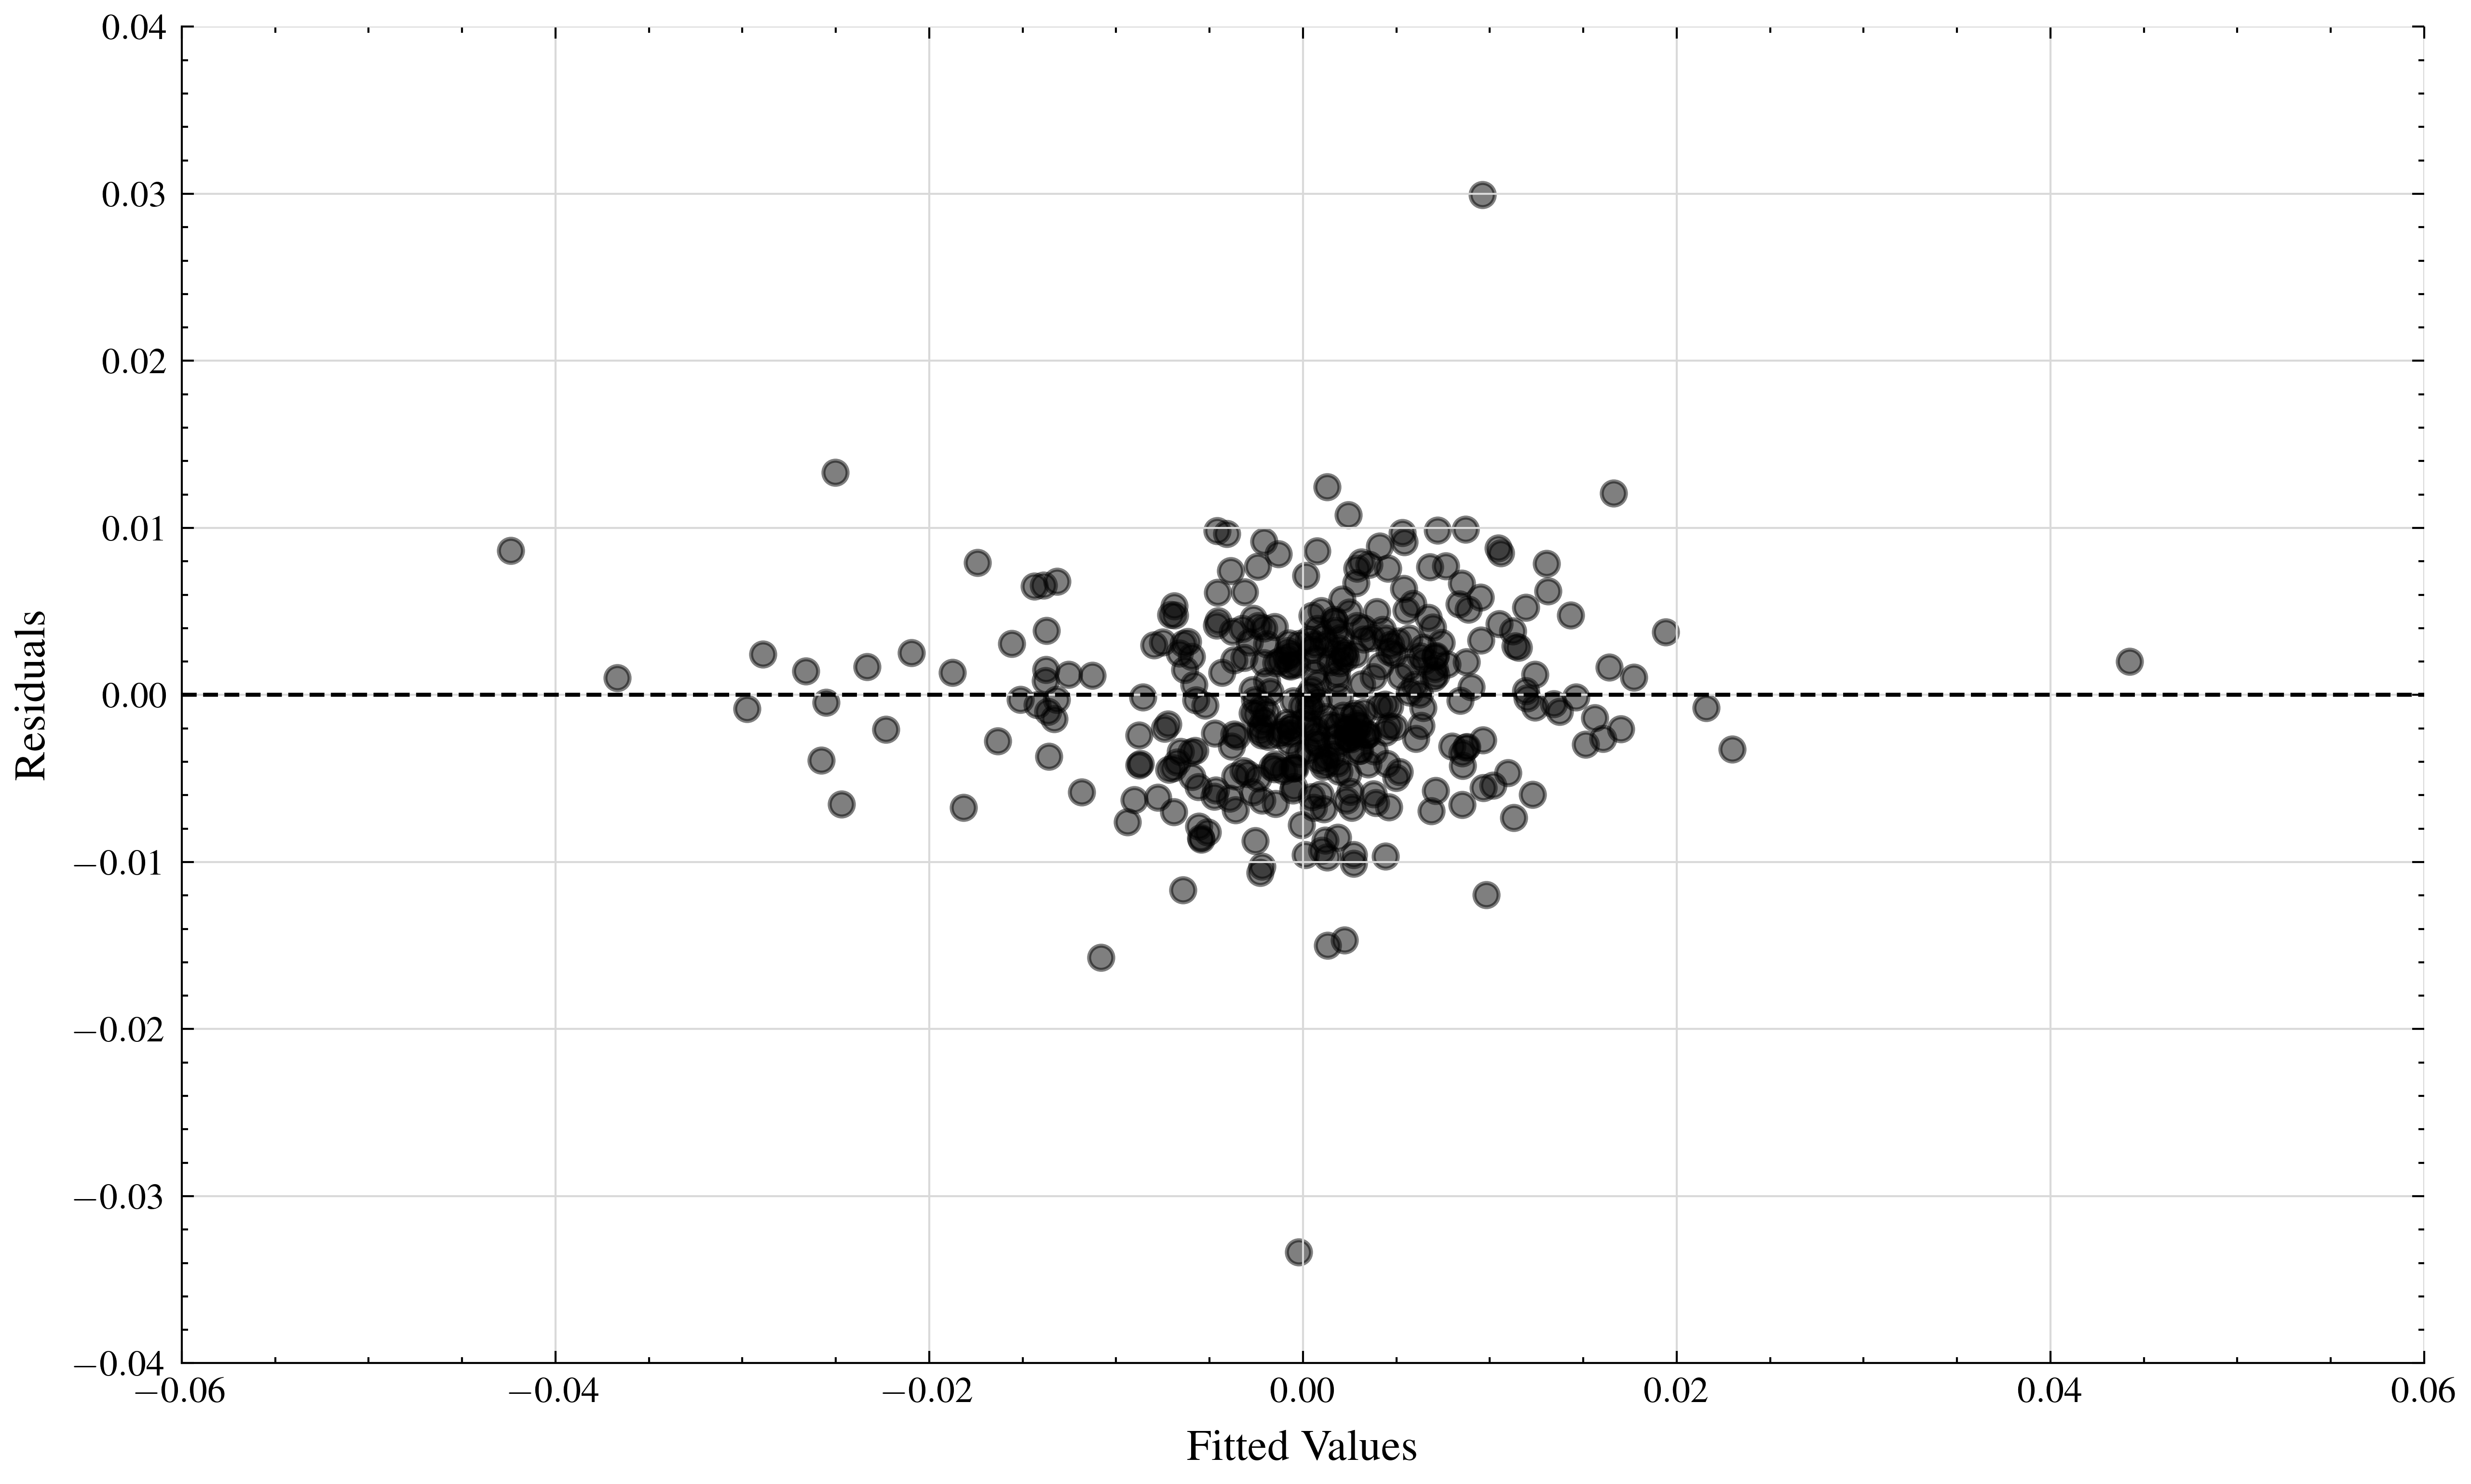

Displayed: Residuals plot for 15_baseline - hold


In [46]:
for sector, df in df_dict.items():
    model = models.olsmodel(
        y='excess_ret',
        features=features_ff5,
        lags=3,
        run_name=f'{sector}_baseline',
        fama_french_ver='ff5',
        experiment_name='baseline_ols'
    )
    model.fit(df)

